# Problem Set 3

**Experimental Uncertainties and Error Propagation**

CHEM 114

Shimon Weiss

**Due Monday, April 26th**

---

## Import dependencies 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lmfit
from lmfit import Model, report_fit
from uncertainties import ufloat
from sympy import init_printing
init_printing()  # beautiful maths

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # use this for hi-dpi displays
sns.set_style('whitegrid')  # set the plotting style

## Problem 1

Compute the following dimensionless quantity and find the correct error bars (pay attention to the order of operations indicated by the
brackets):

$$[(0.0045 \pm 0.0005) + (0.3 \pm 0.9)] / (1.5 \pm 0.1) = ?$$

- Write out eqation(s) used for error propagation in a markdown cell with $\LaTeX$ (see [cheatsheet](https://wch.github.io/latexsheet/latexsheet.pdf))
- pretty print solution, see `uncertainties` [documentation](https://uncertainties-python-package.readthedocs.io/_/downloads/en/stable/pdf/)
for examples

---


## Solution 1

Using the `uncertainties` module, we can easily calculate the quantity and the the error bar.

The error propagation for addition is:

$$\alpha_Z = \sqrt{(\alpha_A)^2 + (\alpha_B)^2}$$

The error propagation for division is:

$$\alpha_Z = \sqrt{(\frac{\alpha_A}{A})^2 + (\frac{\alpha_B}{B})^2}$$



In [3]:
# perform calculation
x = (ufloat(0.0045, 0.0005) + ufloat(0.3, 0.9)) / ufloat(1.5, 0.1)

# pretty print solution using the CORRECT number of significant figures
print(f'x = {x:.1uP}')

x = 0.2±0.6


---

## Problem 2


Report the following numerical distance correctly, with error
bars $$X+Y$$ where $X = 110.125 \pm 0.003$ m and $Y = 85.6 \pm 0.2$ m

---

## Solution 2

Whether we use the $\sigma_Z = \sigma_X + \sigma_Y$ method or the quadrature method, 
the error in $X + Y$ is dominated by the error in $Y$ (i.e. $\sigma_Y \gg \sigma_X$).

Thus the error bar is $0.2$ m 

Next, we round $110.125 + 85.6 = 195.725$ to the tenths digit, 
giving $195.7 \pm 0.2$ m


---
## Problem 3

Express the following result in proper rounded form, with suitable error bars: 

mass $ = 19.1234$ g with uncertainty $0.6789$ g.

---

## Solution 3

First we need to round the error bar to $1$ or $2$ sig figs. 
Let's round to 1 sig fig: $0.7$ g 

Then we round the mass to this figure: $19.1$ g

Giving: $19.1(7)$ g

---
## Problem 4

Your experiment yielded the following measurement:

$(4.1234 \pm 0.4321)$ Joules

Report this number with proper error bars and appropriate signicant figures.

---

## Solution 4

Either 

$(4.1 \pm 0.4)$ J 

or 

$(4.12 \pm 0.43)$ J

---
## Problem 5

How many signicant gures are there in each of the following expressions?
- $0.00082$ s

- $0.14800$ psi

- $6.24 \times 10^6$ l

- $-754.090 \times 10^{-27}$ J

- $50$ cm

- $50$ m

---

## Solution 5

- $0.00082$ s: 2 sig figs

- $0.14800$ psi: 5 sig figs

- $6.24 \times 10^6$ l: 3 sig figs

- $-754.090 \times 10^{-27}$ J: 6 sig figs

- $50$ cm: 1 or 2 sig figs

- $50$ m: 1 or 2 sig figs

---

## Problem 6

You measure the length of an object with a ruler with smallest division of 1 mm. 

You measure the length 5 times with results in mm, estimating the last digit: 

$123.4, 123.5, 124.6, 123.7, 123.8$ mm 

- What is the average length and the uncertainty in length?

---


## Solution 6

For an "analog" device with the smallest division of 1 mm, 
and we can only estimate to 1/2 of the smallest division i.e. $0.5$ mm.
Giving:

$123.8(5)$ mm

---

## Problem 7

The Richter magnitude of an earthquake is determined
from the logarithm of the amplitude of waves 
recorded by seismographs 
(adjustments are included to compensate for the
variation in the distance between the various seismographs and the epicenter of the earthquake). The formula is defined as:

$$M_L = log_{10}(A / A_0(\delta))$$

where $A$ is the maximum excursion of the 
Wood-Anderson seismograph, the
empirical function $A_0$ depends only on the
epicentral distance of the station, $\delta$. 
Both $A$ and $\delta$ are prone to measurement error. 

Write an expression for the uncertainty in $M_L$ 
due to errors in $A$ and $\delta$
- Write the propagation error formula for $M_L$, 
    (this can be done in either $\LaTeX$ or `sympy`)
- use the [`sympy`](https://docs.sympy.org/latest/index.html) module to solve for the uncertainty.
  - you will need to import each function from the `sympy` package e.g. `from sympy import Eq`
  - useful examples/tutorial can be found in the 
  [iPython cookbook](https://github.com/ipython-books/cookbook-2nd-code/tree/master/chapter15_symbolic)

---

## Solution 7

The propagation of error formula for $M_L$ (written with $\LaTeX$) is:

$$\sigma^2_{M_L} = \left|\frac{\partial{M_L}}{\partial{A}}\right|^2\sigma^2_A + \left|\frac{\partial{M_L}}{\partial{\delta}}\right|^2\sigma^2_{\delta}$$

Using `sympy` we can solve for the partial derivatives $\frac{\partial{M_L}}{\partial{A}}$
and $\frac{\partial{M_L}}{\partial{\delta}}$

Note that the expression for uncertainty in $M_L$ can be, perhaps more easily, 
expressed with `sympy` i.e. either approach will receive full credit. 

In [4]:
from sympy import Eq, symbols, Abs, log, Function, Derivative, diff

In [5]:
# define the symbols
ML, A, delta = symbols('M_L, A, delta')
sigma_2_ml, sigma_2_A, sigma_2_delta = symbols('sigma^2_ML, sigma^2_A, sigma^2_delta')
ML, A, delta, sigma_2_ml, sigma_2_A, sigma_2_delta

In [6]:
# define a A0 as a function of delta
A0 =  Function('A0')(delta) 
A0

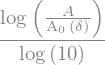

In [7]:
ML_expr = log(A/A0, 10) # convert from base e to base 10
ML_expr

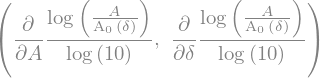

In [8]:
# write expression for derivatives 
dML_dA = Derivative(ML_expr, A)
dML_ddelta = Derivative(ML_expr, delta)
dML_dA, dML_ddelta

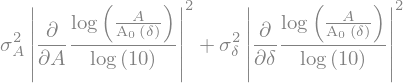

In [9]:
# write expression for uncertainty in ML
sigma_2_ML = Abs(dML_dA)**2*sigma_2_A + Abs(dML_ddelta)**2*sigma_2_delta
sigma_2_ML

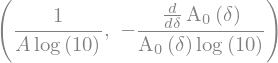

In [10]:
# perform partial differentiation
dML_dA = diff(ML_expr, A)
dML_ddelta = diff(ML_expr, delta)
dML_dA, dML_ddelta

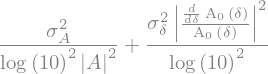

In [11]:
# solution of uncertainty in ML
sigma_2_ML = Abs(dML_dA)**2*sigma_2_A + Abs(dML_ddelta)**2*sigma_2_delta
sigma_2_ML

---
## Problem 8

After measuring the speed of sound $u$ several times, a student concludes that the standard
deviation $\sigma_u$ of her measurements is $\sigma_u = 10$ m/s. 
If all uncertainties were truly random,
she could get any desired precision by
making enough measurements and averaging.

- How many measurements are needed to give a nal uncertainty of 3 m/s?
- How many for a final uncertainty of only $\pm 0.5$ m/s?

---

## Solution 8

The `sympy` module can also be used to evaluate expressions:


In [12]:
delta, sigma_u, n = symbols('delta, sigma_u, n')
delta, sigma_u, n

In [13]:
from sympy import sqrt, evalf, Eq, solve

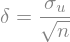

In [14]:
# set delta equal to expression using `Eq` class
delta_eq = Eq(delta, sigma_u / sqrt(n))
delta_eq

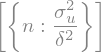

In [15]:
# rearrange for n and save in dict
n_dict = solve(delta_eq, n, dict=True)
n_dict

In [16]:
n_expr = n_dict[0].values()

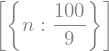

In [17]:
# create a dictionary of values to evaluate expression with
subs = {delta: 3, sigma_u: 10}

# solve for n
solve(delta_eq.subs(subs), n, dict=True)

In [18]:
# create a dictionary of values to evaluate expression with
subs = {delta: 0.5, sigma_u: 10}

# solve for n
solve(delta_eq.subs(subs), n, dict=True)

---
## Problem 9
The uncertainty in  digital measurements can be taken to the last digit. 
Report the uncertainty of the measurements below:
- A digital voltmeter reads voltages to the nearest thousandth of a volt. 
What will be its percent uncertainty in measuring a voltage of approximately $3$ V?
- A digital balance reads masses to the nearest hundredth of a gram. 
What will be its percent uncertainty in measuring a mass of approximately $6$ g? 

---

## Solution 9

- A measurement of $3.000 \pm 0.001$ V would be expressed as $3.000 \pm 0.03\%$ V.
- $6.00 \pm 0.01$ g would be written as $6.00 \pm 6\%$ g.


---
## Problem 10

| h (m) all +\- 0.05 | v^2 (m^2/s^2) |
|--------------------|---------------|
| 0.4                | 7  +/- 3        |
| 0.8                | 17 +/- 3        |
| 1.4                | 25 +/- 3        |
| 2.0                | 38 +/- 4        |
| 2.6                | 45 +/- 5        |
| 3.4                | 62 +/- 5        |
| 3.8                | 72 +/- 6        |

Use the table to plot the following:

- Make a plot of $v^2$ against $h$, including vertical and horizontal error bars. 
- Is your plot consistent
with the prediction that $v^2 \propto h$?
- The slope of your graph should be $2 g$. Use `lmfit` to calculate the slope
    - create a dictionary of the parameter results using `your_result.params.valuesdict()`
    - print the slope and its error on the graph using `plt.text()` 
    >HINT: you can access these values with the syntax 
      `your_result.params['your_param'].value` and `your_result.params['your_param'].stderr`
- plot the best fit line and fit uncertainty using `plt.errorbars()`
    - make sure you adjust the `capsize` so that the errorbars are visible
    >HINT: you can access the fit uncertainty with `your_result.eval_uncertainty()`
- Are your results consistent with the accepted value $2g = 19.6~m^2/s^2$?
---

## Solution 10

In [19]:
# create data arrays
h = np.array([0.4, 0.8, 1.4, 2.0, 2.6, 3.4, 3.8])
a = np.array([7, 17, 25, 38, 45, 62, 72])
yerr = np.array([3, 3, 3, 4, 5, 5, 6])
xerr = np.ones(7)*0.5
h, a, yerr, xerr

(array([0.4, 0.8, 1.4, 2. , 2.6, 3.4, 3.8]),
 array([ 7, 17, 25, 38, 45, 62, 72]),
 array([3, 3, 3, 4, 5, 5, 6]),
 array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]))

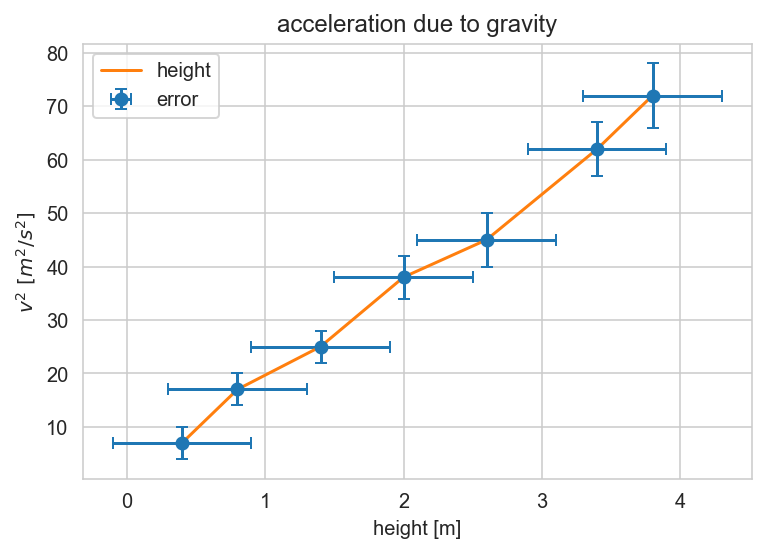

In [20]:
# quickly plot data to see shape and behavior
plt.errorbar(h, a, yerr=yerr, xerr=xerr, fmt='o', capsize=3, label = 'error')
plt.plot(h, a, label='height')
plt.xlabel('height [m]')
plt.ylabel('$v^2~[m^2/s^2]$')
plt.title('acceleration due to gravity')
plt.legend();

In [21]:
# define a fit function

def linear(x, m=1, b=0): # set initial (default) values if desired
    return x*m + b 

In [22]:
linear(h)

array([0.4, 0.8, 1.4, 2. , 2.6, 3.4, 3.8])

In [23]:
# pass your model to lmfit module
model = Model(linear)

# calculate fit 
result = model.fit(a, x = h)
result

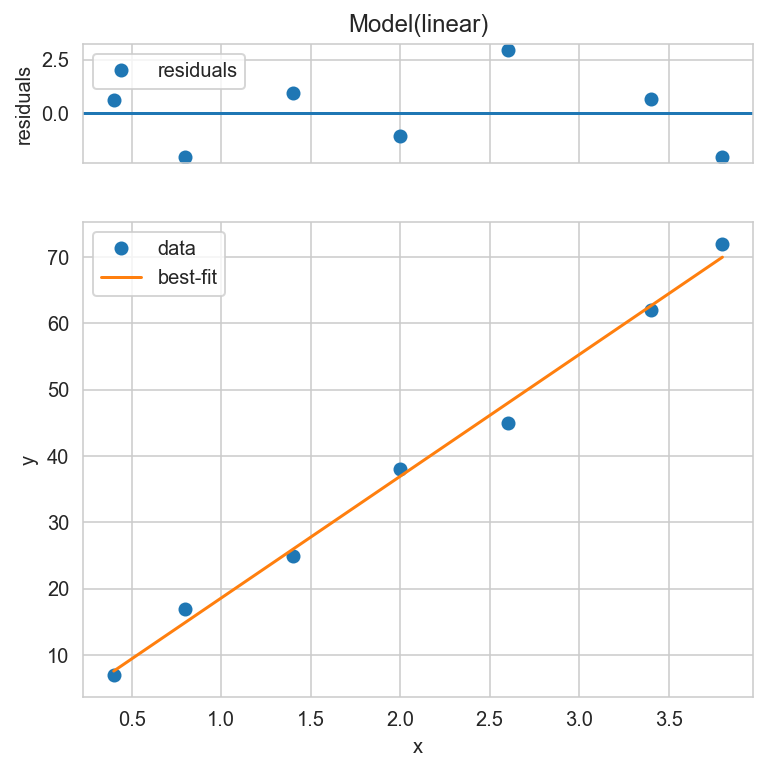

In [24]:
# lmfit provides a simple plot with residuals
result.plot();

In [25]:
result.params.valuesdict() 

OrderedDict([('m', 18.348729054964352), ('b', 0.2540425552041056)])

In [26]:
fit_uncertainty = result.eval_uncertainty()
fit_uncertainty

array([1.43527198, 1.21768298, 0.9560266 , 0.83771165, 0.91982263,
       1.26218339, 1.48469396])

In [27]:
slope = result.params['m'].value
err_slope = result.params['m'].stderr

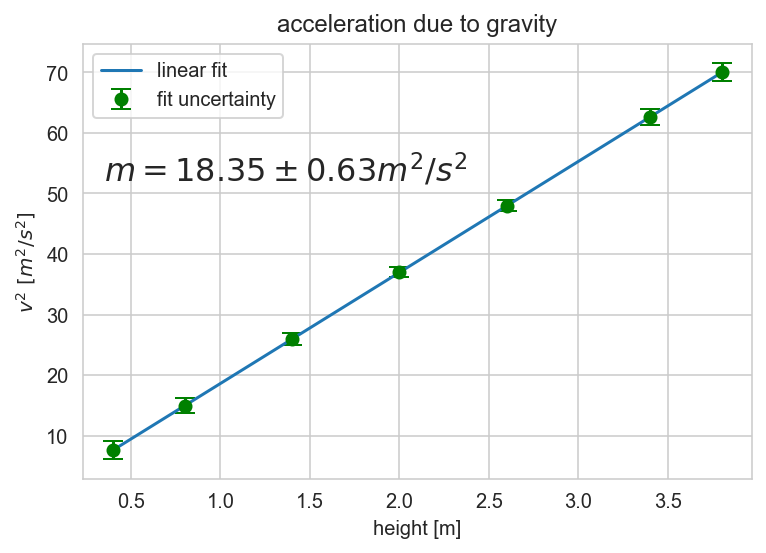

In [28]:
# plot in matplotlib - optional lmfit plot is good as long
# as labels are changed and error bars are included

plt.errorbar(h, result.best_fit, yerr=fit_uncertainty, fmt='go', capsize=5, label='fit uncertainty')
plt.plot(h, result.best_fit, label='linear fit')
plt.xlabel('height [m]')
plt.ylabel('$v^2~[m^2/s^2]$')
plt.title('acceleration due to gravity')
plt.text(0.35, 52, f'$m = {slope: .2f}\pm {err_slope: .2f} m^2/s^2$', fontsize=16)
plt.legend();

In [29]:
res = result.residual

In [30]:
from matplotlib import gridspec

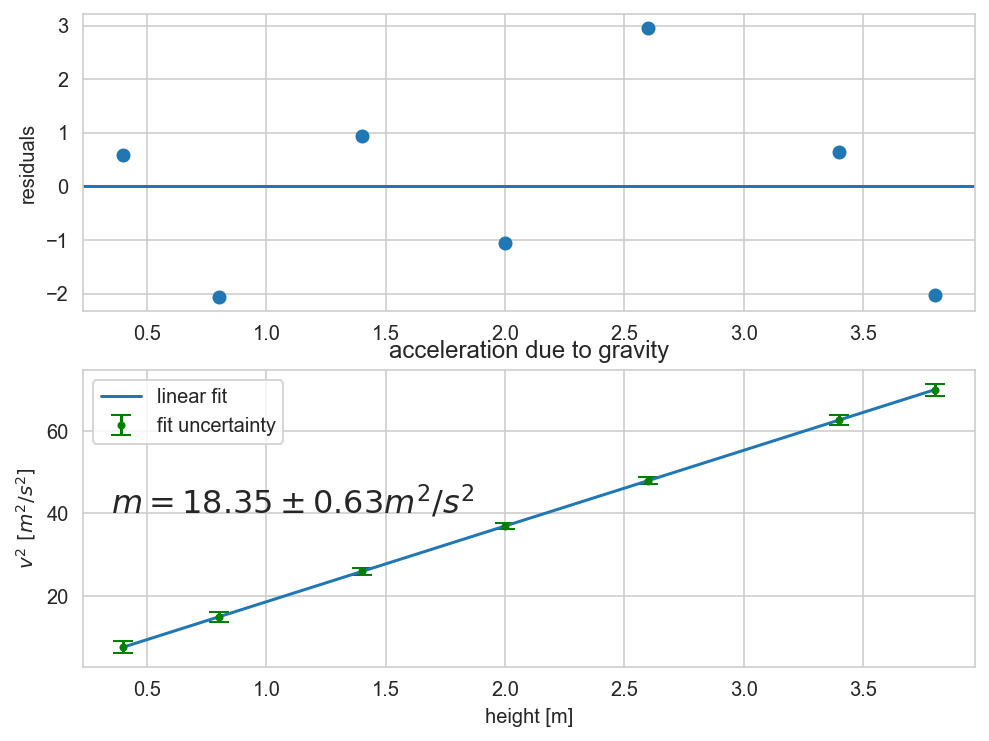

In [31]:
fig, ax = plt.subplots(2, 1, figsize = (8, 6))

ax[0].plot(h, res, 'o')
ax[0].axhline(0)
ax[0].set_ylabel('residuals')
ax[1].errorbar(h, result.best_fit, yerr=fit_uncertainty, markersize='3', fmt='go', capsize=5, label='fit uncertainty')
ax[1].plot(h, result.best_fit, label='linear fit')
ax[1].set_xlabel('height [m]')
ax[1].set_ylabel('$v^2~[m^2/s^2]$')
ax[1].set_title('acceleration due to gravity')
ax[1].text(0.35, 40, f'$m = {slope: .2f} \pm {err_slope: .2f} m^2/s^2$', fontsize=16)
ax[1].legend()
fig.savefig('gravity', dpi=400);

The calculated slope is not significantly accurate with $2g$:

In [32]:
print(f'm = {slope + err_slope: .1f} m^2/s^2')

m =  19.0 m^2/s^2


---

## Confidence interval

Now we look at a problem where calculating the error from approximated 
covariance can lead to misleading results
calculating the posterior probability distribution of parameters. 
In fact such a problem is particularly hard for the Levenberg-Marquardt method, 
so we first estimate the results using the slower but robust Nelder-Mead method. 
We can then compare the uncertainties computed with those estimated using 
Levenberg-Marquardt around the previously found solution. 
We can also compare to the results of using `Minimizer.emcee`.

In [33]:
x = np.linspace(0.3, 10, 100)
x.size

In [42]:
np.random.seed(0)
y = 1/(0.1*x) + 2 + 0.1*np.random.randn(x.size)
y

array([35.50973857, 27.16691927, 22.26080659, 19.06082401, 16.63931054,
       14.56211876, 13.35780748, 12.1283069 , 11.21614596, 10.50259831,
        9.82813759,  9.40349187,  8.85228447,  8.36646789,  8.02625944,
        7.68405236,  7.50365345,  7.06684286,  6.87712175,  6.54075865,
        6.17027098,  6.3070071 ,  6.15884181,  5.84192274,  5.99840403,
        5.49159503,  5.5164595 ,  5.37634334,  5.43903962,  5.33021562,
        5.10249194,  5.03418429,  4.82212998,  4.63210903,  4.71903354,
        4.69710835,  4.73585567,  4.66784478,  4.44683096,  4.39624031,
        4.2652668 ,  4.17432951,  4.09430092,  4.41083403,  4.11770948,
        4.07974469,  3.95498943,  4.11646403,  3.83739883,  3.93912201,
        3.8339039 ,  3.9265621 ,  3.80250496,  3.70245903,  3.78579966,
        3.80064569,  3.73470199,  3.72952628,  3.60801807,  3.60824416,
        3.55119437,  3.55722138,  3.48737496,  3.37231556,  3.53964884,
        3.4593675 ,  3.31481268,  3.50301748,  3.34550983,  3.42

In [35]:
def residual(p, a=0.1, b=1):
    return 1/(a*x) + b - y

In [38]:
mini = lmfit.Minimizer(residual, 'a', 'b')

In [39]:
result = mini.minimize()
result

AttributeError: 'MinimizerResult' object has no attribute 'params'

In [ ]:
ci = lmfit.conf_interval(mini, result)
ci

In [ ]:
lmfit.printfuncs.report_ci(ci)

In [ ]:
# define x-array

x = np.linspace(1, 10, 250)
x.size

In [ ]:
# set the seed for the random number generator
np.random.seed(0)

# define a randomly distributed sum of exponentials 
y = 3.0*np.exp(-x/2) - 5.0*np.exp(-(x-0.1)/10.) + 0.1*np.random.randn(x.size)
y

In [ ]:
p = lmfit.Parameters()
p.add_many(('a1', 4.), ('a2', 4.), ('t1', 3.), ('t2', 3.))
p

In [ ]:
# define a function for the residuals

def residual(p):
    return p['a1']*np.exp(-x/p['t1']) + p['a2']*np.exp(-(x-0.1)/p['t2']) - y

In [ ]:
# create Minimizer
mini = lmfit.Minimizer(residual, p, nan_policy='propagate')

In [ ]:
# first solve with Nelder-Mead algorithm
out1 = mini.minimize(method='Nelder')
out1

In [ ]:
# then solve with Levenberg-Marquardt using the
# Nelder-Mead solution as a starting point
out2 = mini.minimize(method='leastsq', params=out1.params)
out2

In [ ]:
lmfit.report_fit(out2.params, min_correl=0.5)

In [ ]:
# calculate the confidence interval
ci, trace = lmfit.conf_interval(mini, out2, sigmas=[1, 2], trace=True)
lmfit.printfuncs.report_ci(ci)

In [ ]:
# plot data and best fit

plt.plot(x, y)
plt.plot(x, residual(out2.params) + y, '-');

In [ ]:
# plot confidence intervals (a1 vs t2 and a2 vs t2)
fig, axes = plt.subplots(1, 2, figsize=(12.8, 4.8))
cx, cy, grid = lmfit.conf_interval2d(mini, out2, 'a1', 't2', 30, 30)
ctp = axes[0].contourf(cx, cy, grid, np.linspace(0, 1, 11))
fig.colorbar(ctp, ax=axes[0])
axes[0].set_xlabel('a1')
axes[0].set_ylabel('t2')

cx, cy, grid = lmfit.conf_interval2d(mini, out2, 'a2', 't2', 30, 30)
ctp = axes[1].contourf(cx, cy, grid, np.linspace(0, 1, 11))
fig.colorbar(ctp, ax=axes[1])
axes[1].set_xlabel('a2')
axes[1].set_ylabel('t2')

# plot dependence between two parameters
fig, axes = plt.subplots(1, 2, figsize=(12.8, 4.8))
cx1, cy1, prob = trace['a1']['a1'], trace['a1']['t2'], trace['a1']['prob']
cx2, cy2, prob2 = trace['t2']['t2'], trace['t2']['a1'], trace['t2']['prob']

axes[0].scatter(cx1, cy1, c=prob, s=30)
axes[0].set_xlabel('a1')
axes[0].set_ylabel('t2')

axes[1].scatter(cx2, cy2, c=prob2, s=30)
axes[1].set_xlabel('t2')
axes[1].set_ylabel('a1');